# Define a model

In [14]:
from eiscirc import ImpedanceModel

# Provide an equivalent circuit by writing an string where - is for series and // for parallel circuits
model = ImpedanceModel("R0-CPE1//R1")

# Model uses the default values in PARAMETER_CONFIG dictionary in `eiscirc/impedance_parameters_default.py` if not updated
print (dict(model.params)) 

# Manual update of parameters
model.params.R0 = 50
model.params.CPE1.alpha = 0.9
print (dict(model.params))
print (model.params.R0, model.params.CPE1)

{'R0': 100, 'CPE1_value': 1e-06, 'CPE1_alpha': 0.8, 'R1': 100}
{'R0': 50, 'CPE1_value': 1e-06, 'CPE1_alpha': 0.9, 'R1': 100}
50 (1e-06, 0.9)


# Plot Nyquist

Text(0, 0.5, '-Im(Z)')

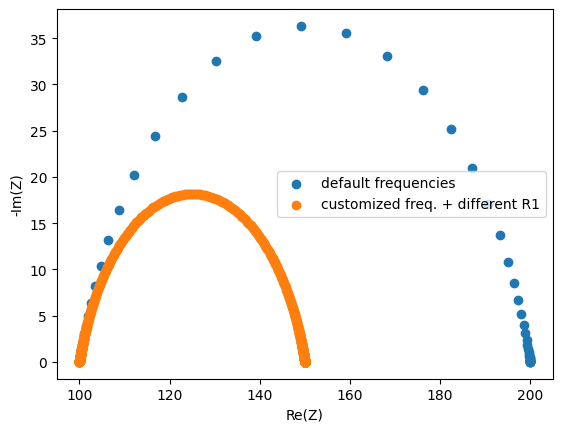

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from eiscirc import ImpedanceModel

model = ImpedanceModel("R0-CPE1//R1")

# A default frequency array is used for the calculation of the impedance Z
plt.scatter(model.Z_real, -model.Z_imag, label = "default frequencies")

# Customize frequencies array can also be provided for the impedance calculation
frequencies = np.logspace(7, -3, 1000)
omega = 2 * np.pi * frequencies
Z = model.impedance(omega, R1 = 50) # change parameter R1 for impedance calculation
plt.scatter(model.Z_real, -model.Z_imag, label = "customized freq. + different R1")

plt.legend()
plt.xlabel("Re(Z)")
plt.ylabel("-Im(Z)")

# Fitting Experimental Data

Default values of model_fit {'R0': 100, 'Rextra': 100, 'CPE1_value': 1e-06, 'CPE1_alpha': 0.8, 'R1': 100}
Fitted: {'Rextra': np.float64(95.9955482212739), 'CPE1': {'value': np.float64(3.089016108875884e-07), 'alpha': np.float64(0.8000293412864931)}, 'R1': np.float64(159.99965204561656), 'R0': 40}


Text(0, 0.5, '-Im(Z)')

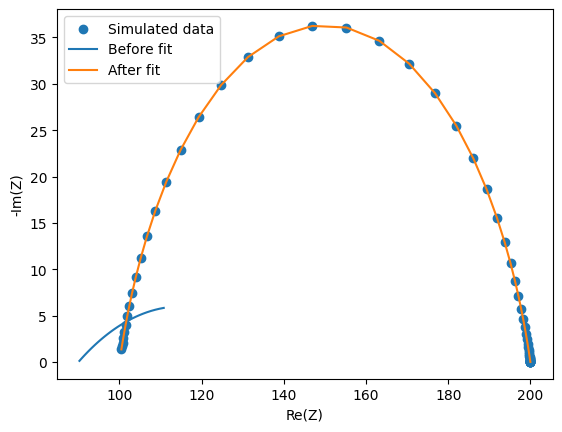

In [39]:
import matplotlib.pyplot as plt
import numpy as np
from eiscirc import ImpedanceModel

model = ImpedanceModel("R0-CPE1//R1")
frequencies_experimental = np.logspace(5, -2, 60)
Z_simulated = model.impedance(2 * np.pi * frequencies_experimental) + 0.01 * np.random.randn(120)

plt.scatter(model.Z_real, -model.Z_imag, label='Simulated data')

# User another model to fit simulated data
model_fit = ImpedanceModel("R0-(Rextra-CPE1)//R1")
print ("Default values of model_fit", dict(model_fit.params))
fitter = ImpedanceFitter(model_fit, frequencies_experimental, Z_simulated)

fitter.set_initial_guess(CPE1_alpha=0.3)       # Optional
fitter.set_fixed_params(R0=40)        # Optional

plt.plot(model_fit.Z_real, -model_fit.Z_imag, label='Before fit')

result = fitter.fit()
print("Fitted:", result.parameters)

plt.plot(model_fit.Z_real, -model_fit.Z_imag, label='After fit')

plt.legend()
plt.xlabel("Re(Z)")
plt.ylabel("-Im(Z)")